# Schizophrenia and Bipolar Disorder Classification

## Problem Statement:

Use ML tools to classify between Schizophrenia and Bipolar Disorder using the dataset in Dataset folder on your google drive.

The dataset is in the form of a pickle file (dictionary file). It has 6 feature keys - ALFF, fALFF, .... - and for each feature, 14 different atlas keys - AAL, Power, .....

For your task, you'll be using only the ReHo feature key, and its 14 corresponding atlas keys to classify between Schizophrenia and Bipolar Disorder with >70% accuracy.

ReHo is a term used in a functional MRI data. ReHo means Regional Homogenity. 
Different features of the dataset are the 14 atlas keys and their corresponding readings flattenend to 1 dimension. 

#### *Cannot upload the dataset

## Approach:
1. get required data in csv format
2. show counts of different classes 
3. dataset has 2390 features and 86 samples
4. perform ols on data
4. dimensionality reduction, and scaling data
5. perform ols on data, check if r-squared is reducing
6. show extracted feaures and interpretation
7. save model


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

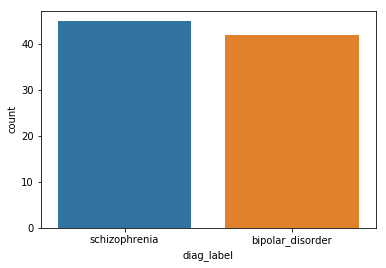

In [2]:
sns.countplot(x = 'diag_label', data=df)

#### diag_code is the output variable
diag_code = 0 => schizophrenia

diag_code = 1 => bipolar disorder

In [68]:
X = df.iloc[:,5:] # training data
y = df['diag_Code']  # labels

In [69]:
dataset = X.join(y, how="inner")

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


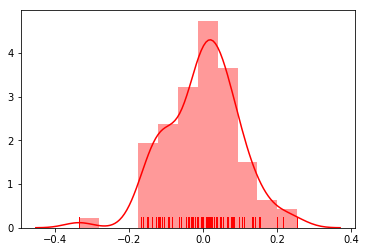

In [5]:
mean_readings = X.mean(axis=1)
sns.distplot(mean_readings, rug=True, color= "red")

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


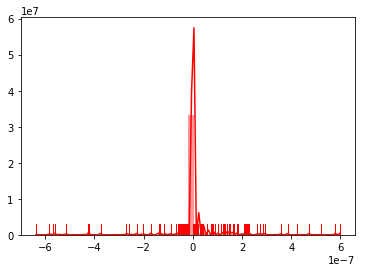

In [6]:
mean_feature = X.mean(axis=0)
sns.distplot(mean_feature, rug=True, color= "red")

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


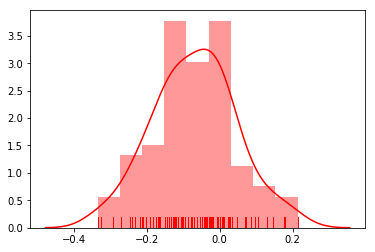

In [7]:
median_readings = X.median(axis=1)
sns.distplot(median_readings, rug=True, color= "red")

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


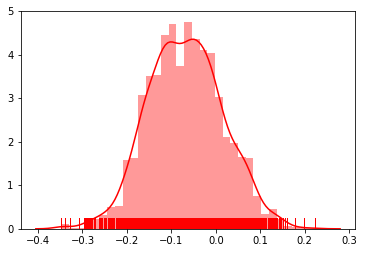

In [8]:
median_feature = X.median(axis=0)
sns.distplot(median_feature, rug=True, color= "red")

In [9]:
import statsmodels.api as sta

In [10]:
model = sta.OLS(y, X.iloc[:,0:50].values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                 -0.657
Method:                 Least Squares   F-statistic:                    0.3103
Date:                Tue, 16 Jun 2020   Prob (F-statistic):               1.00
Time:                        10:14:54   Log-Likelihood:                -76.536
No. Observations:                  87   AIC:                             253.1
Df Residuals:                      37   BIC:                             376.4
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0883      0.178      0.496      0.6

### Note:

The OLS results show that even 10 to 80 features from one dictionary 'aal' (1 type of features) are not enough to understand variability of the data.

#### observations:

r-squared= 22.2% but adjusted r-squared is negative. 

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). 

A low p-value (< 0.05) indicates that you can reject the null hypothesis.

Features with p-value < 0.15 should be included in the model. 

In [11]:
from sklearn.decomposition import PCA,KernelPCA, FactorAnalysis, DictionaryLearning

In [12]:
pca_SBD = PCA(n_components=4)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])


In [13]:
model = sta.OLS(y, pca_df.values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.543
Date:                Tue, 16 Jun 2020   Prob (F-statistic):              0.197
Time:                        10:15:00   Log-Likelihood:                -88.649
No. Observations:                  87   AIC:                             185.3
Df Residuals:                      83   BIC:                             195.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.004      0.042      0.9

#### PCA gives us features that are a combination of other features

It can be seen that 4 features cannot explain more than 2% variability in data.

Now we load PCA to contain 90 percent of data information. 

In [14]:
pca_SBD = PCA(0.9)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents)
print(pca_df.shape)

model = sta.OLS(y, pca_df.values[:,:10]) 

## using OLS on first 10 features Principal components only explain 10.2 % data variability

results = model.fit()

print(results.summary())

(87, 52)
                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.8700
Date:                Tue, 16 Jun 2020   Prob (F-statistic):              0.564
Time:                        10:15:02   Log-Likelihood:                -87.113
No. Observations:                  87   AIC:                             194.2
Df Residuals:                      77   BIC:                             218.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.004      0.041

<Figure size 432x288 with 0 Axes>

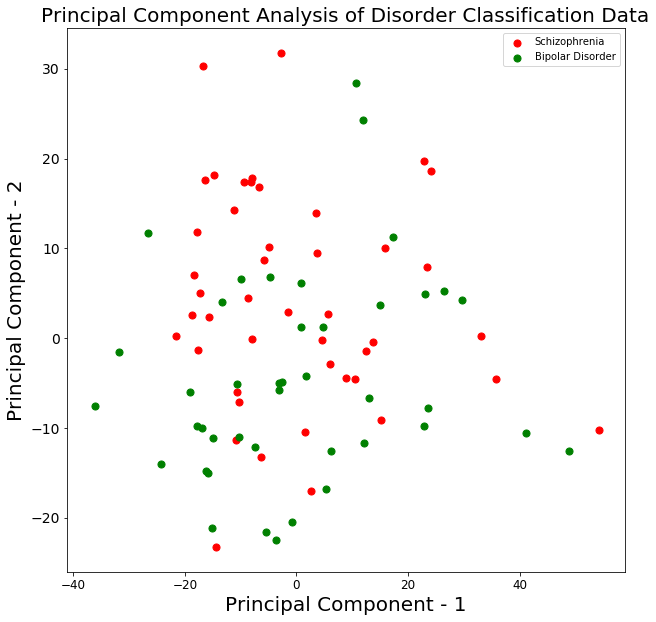

In [15]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Disorder Classification Data",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = pca_df.iloc[:,0:2]
cols = df_graph.columns
y_graph = y.reset_index(drop = 'index')

for target, color in zip(targets,colors):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    

plt.legend(labels=classes)
plt.show()



### Note: 

This means that the 53 features also fail to explain the variability above 19% but adjusted r-square shows that the number of features are very high. 

In [16]:
pca_SBD = PCA(n_components=30)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents)

model = sta.OLS(y, pca_df.values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                 -0.139
Method:                 Least Squares   F-statistic:                    0.6465
Date:                Tue, 16 Jun 2020   Prob (F-statistic):              0.902
Time:                        10:15:15   Log-Likelihood:                -79.030
No. Observations:                  87   AIC:                             218.1
Df Residuals:                      57   BIC:                             292.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0002      0.005      0.039      0.9

<Figure size 432x288 with 0 Axes>

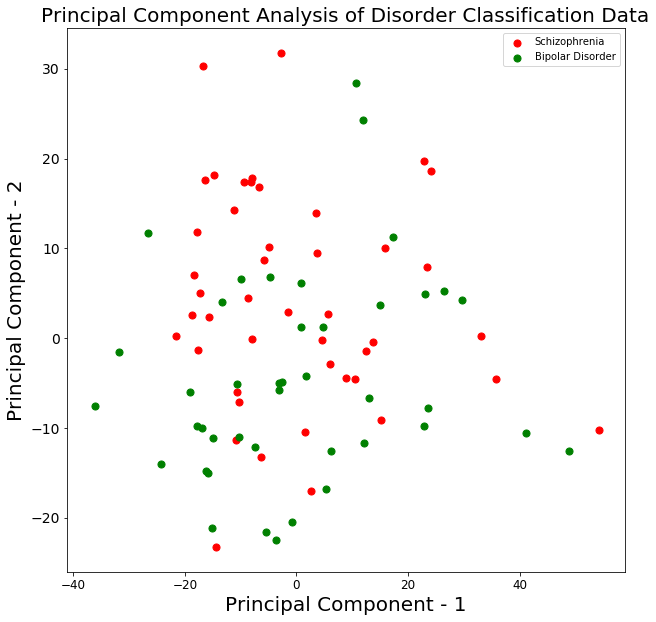

In [17]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Disorder Classification Data",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = pca_df.iloc[:,0:2]
cols = df_graph.columns
y_graph = y.reset_index(drop = 'index')

for target, color in zip(targets,colors):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    

plt.legend(labels=classes)
plt.show()


# Auto-encoders for dimensionality reduction

Auto Encoders are is a type of artificial neural network used to learn efficient data patterns in an unsupervised manner. An Auto Encoder ideally consists of an encoder and decoder.

The Neural Network is designed compress data using the Encoding level. The Decoder will try to uncompress the data to the original dimension.



In [214]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adagrad, Adadelta, Adagrad, Adamax, SGD
from keras.losses import binary_crossentropy, MSE, kld
from keras import callbacks
from keras.initializers import RandomUniform, he_uniform

In [215]:
X = df.iloc[:,5:] # training data
y = df['diag_Code']  # labels

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [217]:
X_train_scaled = minmax_scale(X_train, feature_range=(-1,1), axis = 1)
X_test_scaled = minmax_scale(X_test, feature_range=(-1,1), axis=1)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(60, 2390)
(27, 2390)


### Autoencoder model

Now we begin creating an Autoencoder Model with input shape same as number of features(=2390) and encoding dimension of our choice (=10). 

1. Create 'Input' layer with input shape 2390
2. Then add as many 'Dense' layers as you want (I have used 3 layers), the shape of these layers will decrease gradually (500, 100, 50, ...) and activation function 'relu'

3. create 'Dense' layer of the required encoding dimension. 

4. Then add as many 'Dense' layers as you want (I have used 3 layers), the shape of these layers will increase gradually (..., 50, 100, 500) and activation function 'relu'

5. Finally add output layer with sigmoid activation. 

6. when compiling model set the optimizer to adadelta as adagrad, adam, sgd yield bad results. This means either model doesn't get trained (takes a long time to train) or model doesn't generalize at all. 

In [174]:
### Define the encoder dimension
encoding_dim = 10

# define the number of features
ncol = X.shape[1]
drop_factor = 0.2
#init = RandomUniform(minval=-0.5, maxval=0.5)
init = he_uniform(seed = 42)

# Input Layer
input_layer = Input(shape = (ncol, ))

# Encoder Layers 
first = Dense(2000, activation = 'tanh', kernel_initializer=init)(input_layer)
encode1 = Dense(1500, activation = 'tanh', kernel_initializer=init)(first)
encode2 = Dense(1000, activation = 'tanh', kernel_initializer=init)(encode1)
dropout1 = Dropout(drop_factor)(encode2)
encode3 = Dense(500, activation = 'tanh', kernel_initializer=init)(dropout1)
dropout2 = Dropout(drop_factor)(encode3)
encode4 = Dense(100, activation = 'tanh', kernel_initializer=init)(dropout2)
encode5 = Dense(50, activation = 'tanh', kernel_initializer=init)(encode4)

# mid-layer
mid = Dense(encoding_dim, activation = 'tanh', kernel_initializer=init)(encode5)

# Decoder Layers
decode1 = Dense(50, activation = 'tanh', kernel_initializer=init)(mid)
decode2 = Dense(100, activation = 'tanh', kernel_initializer=init)(decode1)
dropout3 = Dropout(drop_factor)(decode2)
decode3 = Dense(500, activation = 'tanh', kernel_initializer=init)(dropout3)
dropout4 = Dropout(drop_factor)(decode3)
decode4 = Dense(1000, activation = 'tanh', kernel_initializer=init)(dropout4)
decode5 = Dense(1500, activation = 'tanh', kernel_initializer=init)(decode4)
last = Dense(2000, activation = 'tanh', kernel_initializer=init)(decode5)

# Output Layer
output_layer = Dense(ncol, activation = 'tanh')(last)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_layer, outputs = output_layer)

sgd = SGD(lr=0.01, momentum=0.8)

# Callback
my_callbacks = [
    #callbacks.EarlyStopping(patience=2),
    callbacks.ModelCheckpoint(filepath='model.h5',
                              monitor= "val_loss",
                              save_weights_only=True,
                              mode='max',
                              save_best_only=True
                             ),
    callbacks.TensorBoard(log_dir='./logs/baseline_model/'),
]

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 2390)              0         
_________________________________________________________________
dense_113 (Dense)            (None, 2000)              4782000   
_________________________________________________________________
dense_114 (Dense)            (None, 1500)              3001500   
_________________________________________________________________
dense_115 (Dense)            (None, 1000)              1501000   
_________________________________________________________________
dropout_33 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_116 (Dense)            (None, 500)               500500    
_________________________________________________________________
dropout_34 (Dropout)         (None, 500)               0         
__________

In [240]:
autoencoder.get_input_at(2)

ValueError: Asked to get input at node 2, but the layer has only 1 inbound nodes.

# Loss function Selection 

Performed training of this model using mean squared error and kullback Liebler divergence. 

We found that the model trained with 50 epochs: 

1. KLD and KNN algorithm for classification. Validation Accuracy was 77.777%
2. KLD and Random Forest algorithm for classification. Validation Accuracy was 70%
3. MSLE and KNN algorithm for classification. Validation Accuracy was 77.777%
4. MSLE and Random Forest algorithm for classification. Validation Accuracy was 70.307%
5. MSE and Logistic Regression algorithm for classification. Validation Accuracy was 66.666%
6. MSE and SVC algorithm for classification. Validation Accuracy was 70.307%

In [175]:
X_test.shape

(27, 2390)

In [176]:
d = autoencoder.fit(X_train_scaled, X_train_scaled, epochs = 20, batch_size = 32, shuffle = True, validation_split=0.4, callbacks=my_callbacks)

Train on 36 samples, validate on 24 samples
Epoch 1/20
36/36 [==============================] - 2s 56ms/step - loss: -1.0466 - acc: 1.6272e-04 - val_loss: -1.2826 - val_acc: 3.8354e-04
Epoch 2/20
36/36 [==============================] - 1s 30ms/step - loss: -1.3130 - acc: 1.9758e-04 - val_loss: -1.7899 - val_acc: 4.0098e-04
Epoch 3/20
36/36 [==============================] - 1s 25ms/step - loss: -1.8650 - acc: 2.5570e-04 - val_loss: -2.2421 - val_acc: 5.5788e-04
Epoch 4/20
36/36 [==============================] - 1s 26ms/step - loss: -2.3955 - acc: 4.1841e-04 - val_loss: -2.3871 - val_acc: 6.6248e-04
Epoch 5/20
36/36 [==============================] - 1s 29ms/step - loss: -2.5092 - acc: 5.1139e-04 - val_loss: -2.4171 - val_acc: 5.4045e-04
Epoch 6/20
36/36 [==============================] - 1s 27ms/step - loss: -2.5054 - acc: 4.7652e-04 - val_loss: -2.3643 - val_acc: 6.2762e-04
Epoch 7/20
36/36 [==============================] - 1s 27ms/step - loss: -2.5033 - acc: 4.1841e-04 - val_loss:

In [119]:
autoencoder.load_weights('./model.h5')

In [188]:
# serialize model to JSON
model_json = autoencoder.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("model_final.h5")
print("Saved model to disk")

Saved model to disk


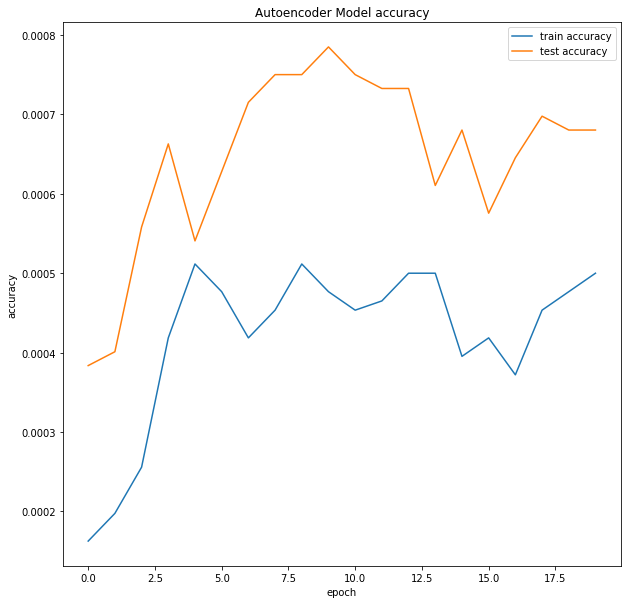

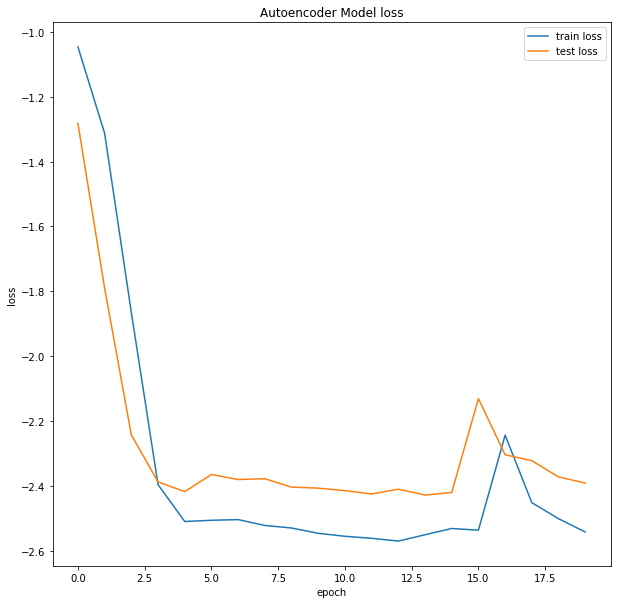

In [177]:
history = d
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Autoencoder Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
#plt.show()

# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

### Use Encoder to reduce dimension

In [178]:
encoder = Model(inputs = input_layer, outputs = mid)
encoded_input = Input(shape = (encoding_dim, ))

encoded_train = pd.DataFrame(encoder.predict(X_train_scaled))
encoded_train = encoded_train.add_prefix('feature_')

encoded_train.head(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,-0.993258,-0.826741,-0.792124,0.835489,-0.997901,0.986415,-0.823255,0.970225,-0.538209,0.729914
1,-0.993116,-0.825079,-0.788042,0.834532,-0.997930,0.986379,-0.828106,0.970044,-0.525571,0.751943
2,-0.993473,-0.841596,-0.786810,0.823666,-0.997513,0.986560,-0.833230,0.968543,-0.470376,0.735539
3,-0.993584,-0.833996,-0.795268,0.834106,-0.997594,0.987045,-0.830497,0.969954,-0.515953,0.720032
4,-0.993086,-0.869872,-0.751084,0.700444,-0.997326,0.986268,-0.805754,0.966983,-0.375268,0.707574
5,-0.993647,-0.839465,-0.770364,0.818401,-0.997548,0.986221,-0.823788,0.968546,-0.451997,0.740561
6,-0.992756,-0.836685,-0.785072,0.820856,-0.997955,0.986538,-0.831745,0.967603,-0.541844,0.751174
7,-0.993312,-0.825456,-0.794688,0.839500,-0.997823,0.986676,-0.828665,0.970583,-0.532617,0.737645
8,-0.993239,-0.839124,-0.784380,0.830629,-0.997615,0.986820,-0.828595,0.968543,-0.526089,0.717912
9,0.993077,0.828106,0.794384,-0.830791,0.997755,-0.986358,0.825658,-0.969338,0.527624,-0.734750


In [236]:
# serialize model to JSON
model_json = encoder.to_json()
with open("encoder_model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("encoder_model_final.h5")
print("Saved Encoder model to disk")

Saved Encoder model to disk


In [179]:
# Performing OLS on training set
model = sta.OLS(y_train, encoded_train.values)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diag_Code   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     3.684
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           0.000971
Time:                        10:58:07   Log-Likelihood:                -46.765
No. Observations:                  60   AIC:                             113.5
Df Residuals:                      50   BIC:                             134.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.1712    178.797      0.482      0.6

<Figure size 432x288 with 0 Axes>

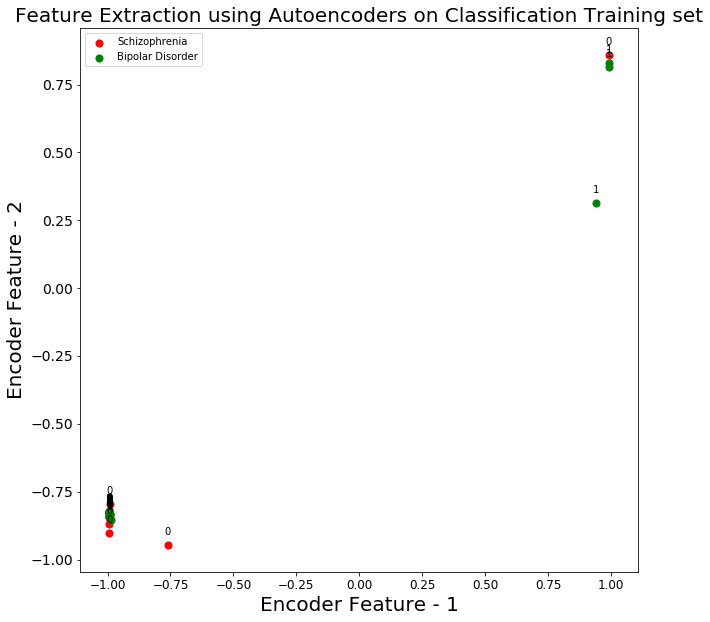

In [180]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Encoder Feature - 1',fontsize=20)
plt.ylabel('Encoder Feature - 2',fontsize=20)
plt.title("Feature Extraction using Autoencoders on Classification Training set",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = encoded_train.iloc[:,0:11]
cols = df_graph.columns
y_graph = y_train.reset_index(drop = 'index')


for target, color, ind in zip(targets,colors, range(len(y_graph))):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    
df_annot = df_graph.values.tolist()     

for i, txt in enumerate(y_graph.tolist()):
    plt.annotate(str(txt), (df_annot[i][0],df_annot[i][1]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.legend(labels=classes)
plt.show()

# Getting Test set

In [181]:
X_test_scaled = minmax_scale(X_test, feature_range=(-1,1), axis=1)
encoded_test = pd.DataFrame(encoder.predict(X_test_scaled))
encoded_test = encoded_test.add_prefix('feature_')

In [182]:
X_train = encoded_train
X_test = encoded_test

## SVM Classifier gives the highest accuracy

In [183]:
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,classification_report, accuracy_score, roc_curve, roc_auc_score, auc

lda = LinearDiscriminantAnalysis()
clf = lda.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lda))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

qda = QuadraticDiscriminantAnalysis()
clf = qda.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(qda))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
[[11  3]
 [11  2]]
                  precision    recall  f1-score   support

   Schizophrenia       0.50      0.79      0.61        14
Bipolar Disorder       0.40      0.15      0.22        13

       micro avg       0.48      0.48      0.48        27
       macro avg       0.45      0.47      0.42        27
    weighted avg       0.45      0.48      0.42        27

Accuracy Score:  0.48148148148148145


 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
[[ 4 10]
 [ 0 13]]
                  precision    recall  f1-score   support

   Schizophrenia       1.00      0.29      0.44        14
Bipolar Disorder       0.57      1.00      0.72        13

       micro avg       0.63      0.63      0.63        27
       macro avg       0.78      0.64      0.58        27
    

In [184]:

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
lr = LogisticRegressionCV()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
#ac = AgglomerativeClustering()
sc = SpectralClustering()
from sklearn.svm import SVC
svc = SVC(probability=True)

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

vc = VotingClassifier([('Random Forest',rf), ('Log_Reg', lr), ('Decision Tree',dt), 
                       #('Agglomerative Clustering',ac), ('Spectral Clustering',sc), 
                       ('Support vector classifier', svc), 
                       ('LDA', lda), ('QDA',qda) ],voting = 'hard', n_jobs= 20)

clf = vc.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(clf))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)
[[10  4]
 [ 8  5]]
                  precision    recall  f1-score   support

   Schizophrenia       0.56      0.71      0.63        14
Bipolar Disorder       0.56      0.38      0.45        13

       micro avg       0.56      0.56      0.56        27
       macro avg       0.56      0.55      0.54        27
    weighted avg       0.56      0.56      0.54        27

Accuracy Score:  0.5555555555555556


In [185]:
vc.score(X_test, y_test)

0.5555555555555556

In [186]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,classification_report, accuracy_score, roc_curve, roc_auc_score, auc

lr = SVC()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
[[13  1]
 [11  2]]
                  precision    recall  f1-score   support

   Schizophrenia       0.54      0.93      0.68        14
Bipolar Disorder       0.67      0.15      0.25        13

       micro avg       0.56      0.56      0.56        27
       macro avg       0.60      0.54      0.47        27
    weighted avg       0.60      0.56      0.48        27

Accuracy Score:  0.5555555555555556


/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Testing Other Classifiers

In [187]:
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV

lr = LinearRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))


lr = LogisticRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))


lr = LogisticRegressionCV()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import GradientBoostingClassifier
lr = GradientBoostingClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

lr = KMeans()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = AgglomerativeClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = SpectralClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.neighbors import KNeighborsClassifier
lr = KNeighborsClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))




 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[[ 3 11]
 [ 1 12]]
                  precision    recall  f1-score   support

   Schizophrenia       0.75      0.21      0.33        14
Bipolar Disorder       0.52      0.92      0.67        13

       micro avg       0.56      0.56      0.56        27
       macro avg       0.64      0.57      0.50        27
    weighted avg       0.64      0.56      0.49        27

Accuracy Score:  0.5555555555555556


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
[[13  1]
 [10  3]]
                  precision    recall  f1-score   support

   Schizophrenia       0.57      0.93      0.70        14
Bipolar Disorder       0.75      0.23      0.35        13

       micro avg       0.59      0.59   

/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/himanshu.ghadigaonkar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/himanshu.g



 LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)
[[10  4]
 [ 7  6]]
                  precision    recall  f1-score   support

   Schizophrenia       0.59      0.71      0.65        14
Bipolar Disorder       0.60      0.46      0.52        13

       micro avg       0.59      0.59      0.59        27
       macro avg       0.59      0.59      0.58        27
    weighted avg       0.59      0.59      0.59        27

Accuracy Score:  0.5925925925925926


 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,

# Cross Validation Score

In [230]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,mean_squared_error, log_loss
from sklearn.metrics import make_scorer

mse = make_scorer(mean_squared_error)

n = encoded_train.shape[0]/3 #single class has at least 20 samples

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(10)

cv_results = cross_val_score(clf, encoded_train, y_train, scoring= mse, cv = int(n))
print(cv_results)

[0.75       0.25       0.5        0.25       0.75       0.
 0.5        0.         0.         0.33333333 0.66666667 0.
 1.         1.         0.5        0.         0.         0.5
 0.         0.        ]


In [199]:
from sklearn.model_selection import StratifiedShuffleSplit

# Saving the model

In [235]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
clf = knn.fit(encoded_train, y_train)
y_hat = knn.predict(encoded_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
[[ 8  6]
 [ 1 12]]
                  precision    recall  f1-score   support

   Schizophrenia       0.89      0.57      0.70        14
Bipolar Disorder       0.67      0.92      0.77        13

       micro avg       0.74      0.74      0.74        27
       macro avg       0.78      0.75      0.73        27
    weighted avg       0.78      0.74      0.73        27

Accuracy Score:  0.7407407407407407


In [241]:
import pickle 

# Its important to use binary mode 
knnPickle = open('knnpickle_file', 'wb') 

# source, destination 
pickle.dump(knn, knnPickle)

In [ ]:
# Schizophrenia and Bipolar Disorder Classification

## Problem Statement:

Use ML tools to classify between Schizophrenia and Bipolar Disorder using the dataset in Dataset folder on your google drive.

The dataset is in the form of a pickle file (dictionary file). It has 6 feature keys - ALFF, fALFF, .... - and for each feature, 14 different atlas keys - AAL, Power, .....

For your task, you'll be using only the ReHo feature key, and its 14 corresponding atlas keys to classify between Schizophrenia and Bipolar Disorder with >70% accuracy.

ReHo is a term used in a functional MRI data. ReHo means Regional Homogenity. 
Different features of the dataset are the 14 atlas keys and their corresponding readings flattenend to 1 dimension. 

#### *Cannot upload the dataset

## Approach:
1. get required data in csv format
2. show counts of different classes 
3. dataset has 2390 features and 86 samples
4. perform ols on data
4. dimensionality reduction, and scaling data
5. perform ols on data, check if r-squared is reducing
6. show extracted feaures and interpretation
7. save model


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

sns.countplot(x = 'diag_label', data=df)

#### diag_code is the output variable
diag_code = 0 => schizophrenia

diag_code = 1 => bipolar disorder

X = df.iloc[:,5:] # training data
y = df['diag_Code']  # labels

dataset = X.join(y, how="inner")

mean_readings = X.mean(axis=1)
sns.distplot(mean_readings, rug=True, color= "red")

mean_feature = X.mean(axis=0)
sns.distplot(mean_feature, rug=True, color= "red")

median_readings = X.median(axis=1)
sns.distplot(median_readings, rug=True, color= "red")

median_feature = X.median(axis=0)
sns.distplot(median_feature, rug=True, color= "red")

import statsmodels.api as sta

model = sta.OLS(y, X.iloc[:,0:50].values)

results = model.fit()

print(results.summary())

### Note:

The OLS results show that even 10 to 80 features from one dictionary 'aal' (1 type of features) are not enough to understand variability of the data.

#### observations:

r-squared= 22.2% but adjusted r-squared is negative. 

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). 

A low p-value (< 0.05) indicates that you can reject the null hypothesis.

Features with p-value < 0.15 should be included in the model. 

from sklearn.decomposition import PCA,KernelPCA, FactorAnalysis, DictionaryLearning

pca_SBD = PCA(n_components=4)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])


model = sta.OLS(y, pca_df.values)

results = model.fit()

print(results.summary())

#### PCA gives us features that are a combination of other features

It can be seen that 4 features cannot explain more than 2% variability in data.

Now we load PCA to contain 90 percent of data information. 

pca_SBD = PCA(0.9)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents)
print(pca_df.shape)

model = sta.OLS(y, pca_df.values[:,:10]) 

## using OLS on first 10 features Principal components only explain 10.2 % data variability

results = model.fit()

print(results.summary())

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Disorder Classification Data",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = pca_df.iloc[:,0:2]
cols = df_graph.columns
y_graph = y.reset_index(drop = 'index')

for target, color in zip(targets,colors):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    

plt.legend(labels=classes)
plt.show()



### Note: 

This means that the 53 features also fail to explain the variability above 19% but adjusted r-square shows that the number of features are very high. 

pca_SBD = PCA(n_components=30)
principalComponents = pca_SBD.fit_transform(X)
pca_df = pd.DataFrame(principalComponents)

model = sta.OLS(y, pca_df.values)

results = model.fit()

print(results.summary())

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Disorder Classification Data",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = pca_df.iloc[:,0:2]
cols = df_graph.columns
y_graph = y.reset_index(drop = 'index')

for target, color in zip(targets,colors):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    

plt.legend(labels=classes)
plt.show()


# Auto-encoders for dimensionality reduction

Auto Encoders are is a type of artificial neural network used to learn efficient data patterns in an unsupervised manner. An Auto Encoder ideally consists of an encoder and decoder.

The Neural Network is designed compress data using the Encoding level. The Decoder will try to uncompress the data to the original dimension.



from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adagrad, Adadelta, Adagrad, Adamax, SGD
from keras.losses import binary_crossentropy, MSE, kld
from keras import callbacks
from keras.initializers import RandomUniform, he_uniform

X = df.iloc[:,5:] # training data
y = df['diag_Code']  # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

X_train_scaled = minmax_scale(X_train, feature_range=(-1,1), axis = 1)
X_test_scaled = minmax_scale(X_test, feature_range=(-1,1), axis=1)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

### Autoencoder model

Now we begin creating an Autoencoder Model with input shape same as number of features(=2390) and encoding dimension of our choice (=10). 

1. Create 'Input' layer with input shape 2390
2. Then add as many 'Dense' layers as you want (I have used 3 layers), the shape of these layers will decrease gradually (500, 100, 50, ...) and activation function 'relu'

3. create 'Dense' layer of the required encoding dimension. 

4. Then add as many 'Dense' layers as you want (I have used 3 layers), the shape of these layers will increase gradually (..., 50, 100, 500) and activation function 'relu'

5. Finally add output layer with sigmoid activation. 

6. when compiling model set the optimizer to adadelta as adagrad, adam, sgd yield bad results. This means either model doesn't get trained (takes a long time to train) or model doesn't generalize at all. 

### Define the encoder dimension
encoding_dim = 10

# define the number of features
ncol = X.shape[1]
drop_factor = 0.2
#init = RandomUniform(minval=-0.5, maxval=0.5)
init = he_uniform(seed = 42)

# Input Layer
input_layer = Input(shape = (ncol, ))

# Encoder Layers 
first = Dense(2000, activation = 'tanh', kernel_initializer=init)(input_layer)
encode1 = Dense(1500, activation = 'tanh', kernel_initializer=init)(first)
encode2 = Dense(1000, activation = 'tanh', kernel_initializer=init)(encode1)
dropout1 = Dropout(drop_factor)(encode2)
encode3 = Dense(500, activation = 'tanh', kernel_initializer=init)(dropout1)
dropout2 = Dropout(drop_factor)(encode3)
encode4 = Dense(100, activation = 'tanh', kernel_initializer=init)(dropout2)
encode5 = Dense(50, activation = 'tanh', kernel_initializer=init)(encode4)

# mid-layer
mid = Dense(encoding_dim, activation = 'tanh', kernel_initializer=init)(encode5)

# Decoder Layers
decode1 = Dense(50, activation = 'tanh', kernel_initializer=init)(mid)
decode2 = Dense(100, activation = 'tanh', kernel_initializer=init)(decode1)
dropout3 = Dropout(drop_factor)(decode2)
decode3 = Dense(500, activation = 'tanh', kernel_initializer=init)(dropout3)
dropout4 = Dropout(drop_factor)(decode3)
decode4 = Dense(1000, activation = 'tanh', kernel_initializer=init)(dropout4)
decode5 = Dense(1500, activation = 'tanh', kernel_initializer=init)(decode4)
last = Dense(2000, activation = 'tanh', kernel_initializer=init)(decode5)

# Output Layer
output_layer = Dense(ncol, activation = 'tanh')(last)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_layer, outputs = output_layer)

sgd = SGD(lr=0.01, momentum=0.8)

# Callback
my_callbacks = [
    #callbacks.EarlyStopping(patience=2),
    callbacks.ModelCheckpoint(filepath='model.h5',
                              monitor= "val_loss",
                              save_weights_only=True,
                              mode='max',
                              save_best_only=True
                             ),
    callbacks.TensorBoard(log_dir='./logs/baseline_model/'),
]

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])

autoencoder.summary()

autoencoder.get_input_at(2)

# Loss function Selection 

Performed training of this model using mean squared error and kullback Liebler divergence. 

We found that the model trained with 50 epochs: 

1. KLD and KNN algorithm for classification. Validation Accuracy was 77.777%
2. KLD and Random Forest algorithm for classification. Validation Accuracy was 70%
3. MSLE and KNN algorithm for classification. Validation Accuracy was 77.777%
4. MSLE and Random Forest algorithm for classification. Validation Accuracy was 70.307%
5. MSE and Logistic Regression algorithm for classification. Validation Accuracy was 66.666%
6. MSE and SVC algorithm for classification. Validation Accuracy was 70.307%

X_test.shape

d = autoencoder.fit(X_train_scaled, X_train_scaled, epochs = 20, batch_size = 32, shuffle = True, validation_split=0.4, callbacks=my_callbacks)

autoencoder.load_weights('./model.h5')

# serialize model to JSON
model_json = autoencoder.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("model_final.h5")
print("Saved model to disk")

history = d
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Autoencoder Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')
#plt.show()

# summarize history for loss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()

### Use Encoder to reduce dimension

encoder = Model(inputs = input_layer, outputs = mid)
encoded_input = Input(shape = (encoding_dim, ))

encoded_train = pd.DataFrame(encoder.predict(X_train_scaled))
encoded_train = encoded_train.add_prefix('feature_')

encoded_train.head(10)

# serialize model to JSON
model_json = encoder.to_json()
with open("encoder_model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
autoencoder.save_weights("encoder_model_final.h5")
print("Saved Encoder model to disk")

# Performing OLS on training set
model = sta.OLS(y_train, encoded_train.values)

results = model.fit()

print(results.summary())

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Encoder Feature - 1',fontsize=20)
plt.ylabel('Encoder Feature - 2',fontsize=20)
plt.title("Feature Extraction using Autoencoders on Classification Training set",fontsize=20)


classes = ['Schizophrenia', 'Bipolar Disorder']
targets = [0, 1]
colors = ['r', 'g']

df_graph = encoded_train.iloc[:,0:11]
cols = df_graph.columns
y_graph = y_train.reset_index(drop = 'index')


for target, color, ind in zip(targets,colors, range(len(y_graph))):
    indicesToKeep = y_graph == target
    plt.scatter(df_graph.loc[indicesToKeep, cols[0]],
                df_graph.loc[indicesToKeep, cols[1]], c = color, s = 50)
    
df_annot = df_graph.values.tolist()     

for i, txt in enumerate(y_graph.tolist()):
    plt.annotate(str(txt), (df_annot[i][0],df_annot[i][1]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.legend(labels=classes)
plt.show()

# Getting Test set

X_test_scaled = minmax_scale(X_test, feature_range=(-1,1), axis=1)
encoded_test = pd.DataFrame(encoder.predict(X_test_scaled))
encoded_test = encoded_test.add_prefix('feature_')

X_train = encoded_train
X_test = encoded_test

## SVM Classifier gives the highest accuracy

from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,classification_report, accuracy_score, roc_curve, roc_auc_score, auc

lda = LinearDiscriminantAnalysis()
clf = lda.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lda))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

qda = QuadraticDiscriminantAnalysis()
clf = qda.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(qda))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
lr = LogisticRegressionCV()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
#ac = AgglomerativeClustering()
sc = SpectralClustering()
from sklearn.svm import SVC
svc = SVC(probability=True)

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

vc = VotingClassifier([('Random Forest',rf), ('Log_Reg', lr), ('Decision Tree',dt), 
                       #('Agglomerative Clustering',ac), ('Spectral Clustering',sc), 
                       ('Support vector classifier', svc), 
                       ('LDA', lda), ('QDA',qda) ],voting = 'hard', n_jobs= 20)

clf = vc.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(clf))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

vc.score(X_test, y_test)

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,classification_report, accuracy_score, roc_curve, roc_auc_score, auc

lr = SVC()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

## Testing Other Classifiers

from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV

lr = LinearRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))


lr = LogisticRegression()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))


lr = LogisticRegressionCV()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.ensemble import GradientBoostingClassifier
lr = GradientBoostingClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering

lr = KMeans()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = AgglomerativeClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

lr = SpectralClustering()
clf = lr.fit(X_train, y_train)
y_hat = clf.fit_predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))



from sklearn.neighbors import KNeighborsClassifier
lr = KNeighborsClassifier()
clf = lr.fit(X_train, y_train)
y_hat = clf.predict(X_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))


# Cross Validation Score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,mean_squared_error, log_loss
from sklearn.metrics import make_scorer

mse = make_scorer(mean_squared_error)

n = encoded_train.shape[0]/3 #single class has at least 20 samples

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(10)

cv_results = cross_val_score(clf, encoded_train, y_train, scoring= mse, cv = int(n))
print(cv_results)

from sklearn.model_selection import StratifiedShuffleSplit

# Saving the model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
clf = knn.fit(encoded_train, y_train)
y_hat = knn.predict(encoded_test)
names = ['Schizophrenia','Bipolar Disorder']
y_hat = y_hat > 0
print('\n\n',str(lr))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, target_names=names))
print('Accuracy Score: ',accuracy_score(y_test, y_hat))

import pickle 

# Its important to use binary mode 
knnPickle = open('knnpickle_file', 'wb') 

# source, destination 
pickle.dump(knn, knnPickle)